In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv('training_data.csv', index_col = 0)
train_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [3]:
train_df.loc[train_df['X2'].eq('SEX')]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [4]:
columns = train_df.loc['ID', :]

In [5]:
columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [6]:
_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'target']

In [7]:
train_df.columns = _columns
train_df.drop('ID', axis=0, inplace=True)

In [8]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
28835,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1


In [9]:
for col in _columns:
    try:
        train_df[col] = train_df[col].astype('float64')
    except:
        continue

In [10]:
train_df.dtypes

LIMIT_BAL    float64
SEX          float64
EDUCATION    float64
MARRIAGE     float64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
target       float64
dtype: object

In [11]:
train_df['EDUCATION'].value_counts()

2.0    10516
1.0     7919
3.0     3713
5.0      208
4.0       90
6.0       42
0.0       11
Name: EDUCATION, dtype: int64

In [12]:
train_df.loc[train_df['EDUCATION'].gt(4)]['target'].value_counts(normalize=True)

0.0    0.904
1.0    0.096
Name: target, dtype: float64

In [13]:
train_df.loc[train_df['EDUCATION'].eq(5)]['target'].value_counts(normalize=True)

0.0    0.918269
1.0    0.081731
Name: target, dtype: float64

In [14]:
train_df.loc[train_df['EDUCATION'].eq(6)]['target'].value_counts(normalize=True)

0.0    0.833333
1.0    0.166667
Name: target, dtype: float64

In [15]:
train_df['EDUCATION'].value_counts()

2.0    10516
1.0     7919
3.0     3713
5.0      208
4.0       90
6.0       42
0.0       11
Name: EDUCATION, dtype: int64

In [16]:
train_df.loc[train_df['EDUCATION'].eq(4)]['target'].value_counts(normalize=True)

0.0    0.933333
1.0    0.066667
Name: target, dtype: float64

In [17]:
train_df.loc[train_df['EDUCATION'].eq(3)]['target'].value_counts(normalize=True)

0.0    0.744412
1.0    0.255588
Name: target, dtype: float64

In [18]:
train_df.loc[train_df['EDUCATION'].eq(2)]['target'].value_counts(normalize=True)

0.0    0.760555
1.0    0.239445
Name: target, dtype: float64

In [19]:
train_df.loc[train_df['EDUCATION'].eq(1)]['target'].value_counts(normalize=True)

0.0    0.806668
1.0    0.193332
Name: target, dtype: float64

In [20]:
train_df.loc[train_df['EDUCATION'].eq(0)]['target'].value_counts(normalize=True)

0.0    1.0
Name: target, dtype: float64

In [21]:
test_df = pd.read_csv('holdout_data.csv', index_col=0)


In [22]:
_columns_test = ['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [23]:
test_df.columns = _columns_test

In [24]:
test_df['EDUCATION'].value_counts()

2    3514
1    2666
3    1204
5      72
4      33
6       9
0       3
Name: EDUCATION, dtype: int64

In [25]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,...,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


In [26]:
train_df['LIMIT_BAL'].describe()

count      22499.000000
mean      167054.521534
std       129864.960118
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

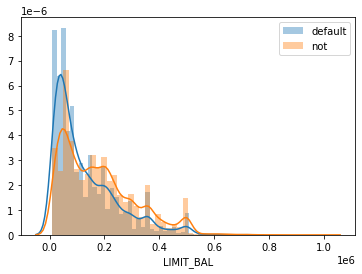

In [27]:
sns.distplot(train_df.loc[train_df['target'].eq(1)]['LIMIT_BAL'], label = 'default')
sns.distplot(train_df.loc[train_df['target'].eq(0)]['LIMIT_BAL'], label ='not')
plt.legend();

In [28]:
train_df['MARRIAGE'].value_counts()


2.0    12026
1.0    10195
3.0      234
0.0       44
Name: MARRIAGE, dtype: int64

In [29]:
train_df['SEX'].value_counts()


2.0    13572
1.0     8927
Name: SEX, dtype: int64

In [30]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,...,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


In [31]:
categorical_columns = ['SEX','EDUCATION','MARRIAGE']

In [32]:
continuous_columns = ['LIMIT_BAL',
#  'SEX',
#  'EDUCATION',
#  'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [35]:
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
28835,220000.0,2.0,1.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,...,221193.0,181859.0,184605.0,10000.0,8018.0,10121.0,6006.0,10987.0,143779.0,1.0
25329,200000.0,2.0,3.0,2.0,29.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,326.0,0.0
18894,180000.0,2.0,1.0,2.0,27.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,80000.0,1.0,2.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,...,43882.0,42256.0,42527.0,1853.0,1700.0,1522.0,1548.0,1488.0,1500.0,0.0
6239,10000.0,1.0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,...,5444.0,2639.0,2697.0,2000.0,1100.0,600.0,300.0,300.0,1000.0,1.0


In [36]:
train_df.reset_index(inplace=True, drop= True)

In [37]:
X = train_df.drop(columns=['target'])
y = train_df['target']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [39]:
ohe = OneHotEncoder(drop='first')
X_train_ohe = ohe.fit_transform(X_train[categorical_columns]).toarray()
X_train_ohe_df = pd.DataFrame(data = X_train_ohe,
                              index = X_train.index,
                             columns = ohe.get_feature_names(categorical_columns))
X_train = X_train[continuous_columns].merge(X_train_ohe_df, left_index=True, right_index=True)
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
2872,230000.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,12218.0,17667.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18488,50000.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,46199.0,47179.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6538,100000.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,70202.0,70978.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5705,310000.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,238739.0,244629.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17706,60000.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,38815.0,40171.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,30000.0,25.0,1.0,3.0,2.0,2.0,2.0,2.0,16368.0,15825.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21575,290000.0,33.0,-2.0,-1.0,0.0,0.0,0.0,0.0,11303.0,17493.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,20000.0,34.0,2.0,0.0,0.0,2.0,2.0,2.0,6099.0,7559.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,130000.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,79705.0,59716.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
X_test_ohe = ohe.transform(X_test[categorical_columns]).toarray()
X_test_ohe_df = pd.DataFrame(data = X_test_ohe,
                              index = X_test.index,
                             columns = ohe.get_feature_names(categorical_columns))
X_test = X_test[continuous_columns].merge(X_test_ohe_df, left_index=True, right_index=True)
X_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
15388,80000.0,49.0,-1.0,2.0,-1.0,-1.0,-1.0,0.0,2222.0,390.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12240,160000.0,26.0,4.0,3.0,3.0,3.0,2.0,2.0,152924.0,152142.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8612,110000.0,36.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,2509.0,1260.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18338,200000.0,30.0,-1.0,2.0,-1.0,2.0,0.0,0.0,1877.0,1690.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15356,150000.0,27.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,4914.0,6237.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13244,100000.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,85366.0,87064.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22116,150000.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,21081.0,7985.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8925,50000.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,47053.0,11165.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,240000.0,41.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,40529.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
2872,0.486361,-0.805526,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.525727,-0.439569,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18488,-0.901232,2.435316,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.070327,-0.030784,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6538,-0.515789,0.598839,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,0.251352,0.298867,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5705,1.103069,0.922923,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,2.510020,2.704192,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
17706,-0.824143,-1.021582,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.169285,-0.127856,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-1.055409,-1.129610,0.909514,2.613502,1.800592,1.884800,1.978054,1.975368,-0.470111,-0.465084,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21575,0.948892,-0.265386,-1.762323,-0.723941,0.135825,0.184195,0.225981,0.248073,-0.537990,-0.441980,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,-1.132497,-0.157358,1.800127,0.110420,0.135825,1.884800,1.978054,1.975368,-0.607732,-0.579580,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,-0.284524,1.138979,1.800127,0.110420,0.135825,0.184195,0.225981,0.248073,0.378707,0.142872,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])
X_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
15388,-0.669966,1.463064,-0.871711,1.779141,-0.696559,-0.666107,-0.650055,0.248073,-0.659690,-0.678882,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12240,-0.053258,-1.021582,3.581352,2.613502,2.632975,2.735103,1.978054,1.975368,1.359960,1.423110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8612,-0.438701,0.058699,-0.871711,-0.723941,-0.696559,-1.516410,-1.526092,-1.479223,-0.655844,-0.666831,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18338,0.255096,-0.589470,-0.871711,1.779141,-0.696559,1.884800,0.225981,0.248073,-0.664313,-0.660875,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15356,-0.130347,-0.913554,-0.871711,-0.723941,-0.696559,-0.666107,0.225981,0.248073,-0.623613,-0.597892,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13244,-0.515789,-0.373414,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,0.454574,0.521682,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22116,-0.130347,-1.021582,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.406949,-0.573680,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8925,-0.901232,1.571092,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.058882,-0.529632,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.563450,0.598839,0.909514,-0.723941,-0.696559,-0.666107,-0.650055,-0.615575,-0.689468,-0.122897,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Training Precision:  0.3762076423936554
Testing Precision:  0.38788221970554926



Training Recall:  0.6504612316130641
Testing Recall:  0.6735496558505408



Training Accuracy:  0.6817600977832102
Testing Accuracy:  0.686



Training F1-Score:  0.4767038187465741
Testing F1-Score:  0.4922745238950773


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Training Precision:  0.7412854030501089
Testing Precision:  0.6577319587628866



Training Recall:  0.3393168785838943
Testing Recall:  0.3136676499508358



Training Accuracy:  0.826379243291294
Testing Accuracy:  0.808



Training F1-Score:  0.465537882674876
Testing F1-Score:  0.4247669773635153


In [47]:
train_df['target'].value_counts(normalize=True)

0.0    0.776523
1.0    0.223477
Name: target, dtype: float64

In [48]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
ohe = OneHotEncoder(drop='first')
X_train_ohe = ohe.fit_transform(X_train[categorical_columns]).toarray()
X_train_ohe_df = pd.DataFrame(data = X_train_ohe,
                              index = X_train.index,
                             columns = ohe.get_feature_names(categorical_columns))
X_train = X_train[continuous_columns].merge(X_train_ohe_df, left_index=True, right_index=True)

X_test_ohe = ohe.transform(X_test[categorical_columns]).toarray()
X_test_ohe_df = pd.DataFrame(data = X_test_ohe,
                              index = X_test.index,
                             columns = ohe.get_feature_names(categorical_columns))
X_test = X_test[continuous_columns].merge(X_test_ohe_df, left_index=True, right_index=True)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[continuous_columns] = scaler.fit_transform(X_train[continuous_columns])
X_test[continuous_columns] = scaler.transform(X_test[continuous_columns])

sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [52]:
smote_lr = LogisticRegression(solver='liblinear')

In [53]:
smote_lr.fit(X_train, y_train)
y_train_pred = smote_lr.predict(X_train)
y_test_pred = smote_lr.predict(X_test)

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_train_pred))
print('Testing Precision: ', precision_score(y_test, y_test_pred))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_train_pred))
print('Testing Recall: ', recall_score(y_test, y_test_pred))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Testing Accuracy: ', accuracy_score(y_test, y_test_pred))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_train_pred))
print('Testing F1-Score: ', f1_score(y_test, y_test_pred))

Training Precision:  0.6717727436174038
Testing Precision:  0.3808487486398259



Training Recall:  0.6677866742922505
Testing Recall:  0.688298918387414



Training Accuracy:  0.6707535030025736
Testing Accuracy:  0.6766666666666666



Training F1-Score:  0.6697737783673322
Testing F1-Score:  0.4903677758318739


In [55]:
X_train

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
0,0.486361,-0.805526,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.525727,-0.439569,...,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.901232,2.435316,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.070327,-0.030784,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.515789,0.598839,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,0.251352,0.298867,...,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.103069,0.922923,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,2.510020,2.704192,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.824143,-1.021582,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.169285,-0.127856,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27971,-0.695326,-1.273581,1.800127,1.779141,1.800592,1.884800,1.978054,1.975368,-0.541672,-0.495535,...,0.332711,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27972,-1.079311,2.684868,0.909514,-1.558302,-1.528942,-1.516410,-1.526092,-1.479223,-0.689468,-0.684284,...,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
27973,-0.780035,1.185197,0.018902,0.110420,1.008258,0.184195,0.225981,0.248073,-0.556835,-0.517310,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
27974,-0.080697,0.088299,-1.115747,-0.723941,-0.696559,-0.666107,0.225981,-0.378927,-0.686027,-0.678585,...,0.725990,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
X_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2.0,EDUCATION_1.0,EDUCATION_2.0,EDUCATION_3.0,EDUCATION_4.0,EDUCATION_5.0,EDUCATION_6.0,MARRIAGE_1.0,MARRIAGE_2.0,MARRIAGE_3.0
15388,-0.669966,1.463064,-0.871711,1.779141,-0.696559,-0.666107,-0.650055,0.248073,-0.659690,-0.678882,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12240,-0.053258,-1.021582,3.581352,2.613502,2.632975,2.735103,1.978054,1.975368,1.359960,1.423110,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8612,-0.438701,0.058699,-0.871711,-0.723941,-0.696559,-1.516410,-1.526092,-1.479223,-0.655844,-0.666831,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18338,0.255096,-0.589470,-0.871711,1.779141,-0.696559,1.884800,0.225981,0.248073,-0.664313,-0.660875,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15356,-0.130347,-0.913554,-0.871711,-0.723941,-0.696559,-0.666107,0.225981,0.248073,-0.623613,-0.597892,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13244,-0.515789,-0.373414,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,0.454574,0.521682,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22116,-0.130347,-1.021582,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.406949,-0.573680,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8925,-0.901232,1.571092,0.018902,0.110420,0.135825,0.184195,0.225981,0.248073,-0.058882,-0.529632,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.563450,0.598839,0.909514,-0.723941,-0.696559,-0.666107,-0.650055,-0.615575,-0.689468,-0.122897,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
